## 1. GBM, XGB, LGBM (25점)

산탄데르 고객만족 데이터 세트에 대해 고객만족 여부를 XGBoost와 LightGBM을 이용해 예측해보자.

### 1.1. 데이터 불러오기 및 전처리

In [ ]:
# drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(문제 아님)

주어진 데이터셋(train_satander.csv)를 pandas를 활용해 읽고, 상위 5행을 출력해주세요.

In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
cust_df=pd.read_csv("./train_satander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


###[문제 1-1] (1점)

전체 데이터에서 Target의 분포를 확인해주세요.

In [6]:
# 전체 데이터에서 만족과 불만족 정도 살피기
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


대부분이 만족이다.

### 데이터 전처리 (문제 아님)

각 피처의 분포를 확인하고, 데이터를 적절히 전처리 해주자.

In [7]:
# 각 피처의 값 분포 확인
# 그냥 실행해주세요
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


-999999를 최빈값인 2로 변환하고, ID피처는 별 의미가 없으므로 드롭한 후, 피처와 레이블 세트를 분리하겠다.

In [8]:
# 그냥 실행해주세요
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

### [문제 1-2] (1점)

데이터의 피처세트와 레이블 세트를 적절히 분리해준 후, 피처 데이터의 shape를 출력해주세요.

In [9]:
# 피처세트와 레이블 세트 분리
X_features = cust_df.drop(columns=['TARGET'])
y_labels = cust_df['TARGET']
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


### [문제 1-3] (2점)

학습 데이터와 테스트 데이터 세트를 분리해주세요. 이때 비대칭한 데이터 세트이므로 Target값의 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출되었는지 확인해야 합니다. test size=0.2, random state=0

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt= y_test.count()
print('학습 세트 Shape :{0}, 테스트 세트 Shape :{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape :(60816, 369), 테스트 세트 Shape :(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


학습과 테스트 데이터 세트 모두 Target 값의 분포가 원본 데이터와 유사하다.

### 1.2. XGBoost 모델 학습

### [문제 1-4] (2점)

n_estimators 500, random_state를 156으로 하는 xgb 학습 모델을 생성하라.

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

### [문제 1-5]

성능 평가 지표를 ROC AUC를 활용할 것이다. 이때 적절한 eval_metric은? (2점)

답 : auc

적절한 eval_metric을 활용하여 모델을 fit하고, 모델의 roc_score를 구하여 출력하라. (2점)

In [12]:
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83789	validation_1-auc:0.82554
[1]	validation_0-auc:0.84273	validation_1-auc:0.82878
[2]	validation_0-auc:0.84901	validation_1-auc:0.83359
[3]	validation_0-auc:0.85530	validation_1-auc:0.83767
[4]	validation_0-auc:0.85891	validation_1-auc:0.83909
[5]	validation_0-auc:0.86117	validation_1-auc:0.84156
[6]	validation_0-auc:0.86378	validation_1-auc:0.84138
[7]	validation_0-auc:0.86737	validation_1-auc:0.84048
[8]	validation_0-auc:0.87021	validation_1-auc:0.84162
[9]	validation_0-auc:0.87258	validation_1-auc:0.84100
[10]	validation_0-auc:0.87505	validation_1-auc:0.84117
[11]	validation_0-auc:0.87747	validation_1-auc:0.84111
[12]	validation_0-auc:0.87872	validation_1-auc:0.84114
[13]	validation_0-auc:0.88087	validation_1-auc:0.84066
[14]	validation_0-auc:0.88208	validation_1-auc:0.84014
[15]	validation_0-auc:0.88340	validation_1-auc:0.83965
[16]	validation_0-auc:0.88557	validation_1-auc:0.83950
[17]	validation_0-auc:0.88664	validation_1-auc:0.84013
[18]	validation_0-au

### 하이퍼 파라미터 튜닝 작업

칼럼의 개수가 많으므로 과적합 가능성을 가정한 뒤, max_depth, min_child_wright, colsample_bytree 하이퍼파라미터만 튜닝 대상으로 하겠다.

또한 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소시키겠다.


### [문제 1-6] (3점)

max_depth를 5부터 7까지, min_child_weight를 1부터 3까지, colsample_bytree를 0.5부터 0.75까지의 범위를 하이퍼 파라미터로 갖는 모델을 fit한 후 최적 파라미터 조합을 출력하고, 그의 ROC AUC값을 알아내어라.

이때 cv=3

In [13]:
from sklearn.model_selection import GridSearchCV

xgb_clf= XGBClassifier(n_estimators=100,
                       eval_metric='auc', early_stopping_rounds=30)

params = {
    'max_depth': range(5, 8),
    'min_child_weight': range(1, 4),
    'colsample_bytree': [0.5, 0.6, 0.7, 0.75]
}

gridcv = GridSearchCV(xgb_clf, param_grid=params, scoring='roc_auc', cv=3)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1])

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ValueError: 
All the 108 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py", line 182, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\callback.py", line 241, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\callback.py", line 241, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
  File "c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\callback.py", line 426, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.


### [문제 1-7] (4점)

앞에서 구한 최적 하이퍼 파라미터를 기반으로 둔 채,early_stopping_rounds=200, learning_rate=0.02, reg_alpha=0.03 로 조정한 모델의 ROC AUC를 구하여라.

In [ ]:
xgb_clf = XGBClassifier(n_estimators=100,
                        max_depth=6,
                        min_child_weight=1,
                        colsample_bytree=0.75,
                        eval_metric='auc',
                        early_stopping_rounds=200,
                        learning_rate=0.02,
                        reg_alpha=0.03,
                        random_state=156)
xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score =  roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83780	validation_1-auc:0.82586
[1]	validation_0-auc:0.83874	validation_1-auc:0.82670
[2]	validation_0-auc:0.83893	validation_1-auc:0.82694
[3]	validation_0-auc:0.83992	validation_1-auc:0.82715
[4]	validation_0-auc:0.84017	validation_1-auc:0.82689
[5]	validation_0-auc:0.84013	validation_1-auc:0.82630
[6]	validation_0-auc:0.84020	validation_1-auc:0.82621
[7]	validation_0-auc:0.84037	validation_1-auc:0.82687
[8]	validation_0-auc:0.84053	validation_1-auc:0.82698
[9]	validation_0-auc:0.84135	validation_1-auc:0.83058
[10]	validation_0-auc:0.84156	validation_1-auc:0.83049
[11]	validation_0-auc:0.84327	validation_1-auc:0.83102
[12]	validation_0-auc:0.84372	validation_1-auc:0.83125
[13]	validation_0-auc:0.84398	validation_1-auc:0.83132
[14]	validation_0-auc:0.84418	validation_1-auc:0.83142
[15]	validation_0-auc:0.84446	validation_1-auc:0.83141
[16]	validation_0-auc:0.84456	validation_1-auc:0.83219
[17]	validation_0-auc:0.84561	validation_1-auc:0.83173
[18]	validation_0-au

이전 테스트보다 살짝 향상된 결과를 보인다.

### 1.3. LGBM 모델 학습

### [문제 1-8] (4점)

n_estimators가 500인 LGBM 학습 모델을 생성해 fit 하고 그 ROC AUC값을 계산하여라.

In [14]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)
lgbm_clf.fit(X_train,y_train)

lgbm_roc_score =roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8140


### 하이퍼 파라미터 튜닝 작업

### [문제 1-9] (4점)

num_leaves를 [32,64],

max_depth를 [128,160],

min_child_samples를 [60,100],

subsample을 [0.8,1]

로 파라미터를 튜닝한 후 이 때 ROC AUC 값을 출력하여라.

* 단, cv=3, n_estimators = 200, early_stopping round=30

In [17]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {
    'num_leaves': [32, 64],
    'max_depth': [128, 160],
    'min_child_samples': [60, 100],
    'subsample': [0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

print('GridSearch 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

KeyboardInterrupt: 

## 2. SVM + KNN (25점)

 길에서 할머니를 도와드리다가 교통사고의 희생양이 된 비타민(2*세). <br/>
 그런데 눈을 떠보니 2024년,
### 화려한 의사 가운을 입고 있었다! <br/>
"이게 무슨 일이지?" 하며 주위를 둘러보는데, 눈에 보이는 [암 전문의 비 타 민] 명패.<br/>
자신이 유방암 연구의 선봉장인 세계적인 의사로 환생했다는 사실을 깨달았다.
<br/><br/>
처음에는 당황스러웠지만, 데이터 분석가 출신인 비타민은 곧 자신에게 주어진 이 놀라운 기회를 최대한 활용하기로 마음먹는데...

### 데이터 설명

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [19]:
#데이터 불러오기
cancer=load_breast_cancer()

In [20]:
#타입 확인
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
#변수명 확인
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
# malignant(악성), benign(양성) 입니다
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [23]:
# DataFrame을 만들어서 진행해볼게요 :)

col_names = list(cancer.feature_names)
col_names.append('target')

df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### 2.1(3점) 아래의 시각화를 진행해보고, 자유롭게 해석해보세요

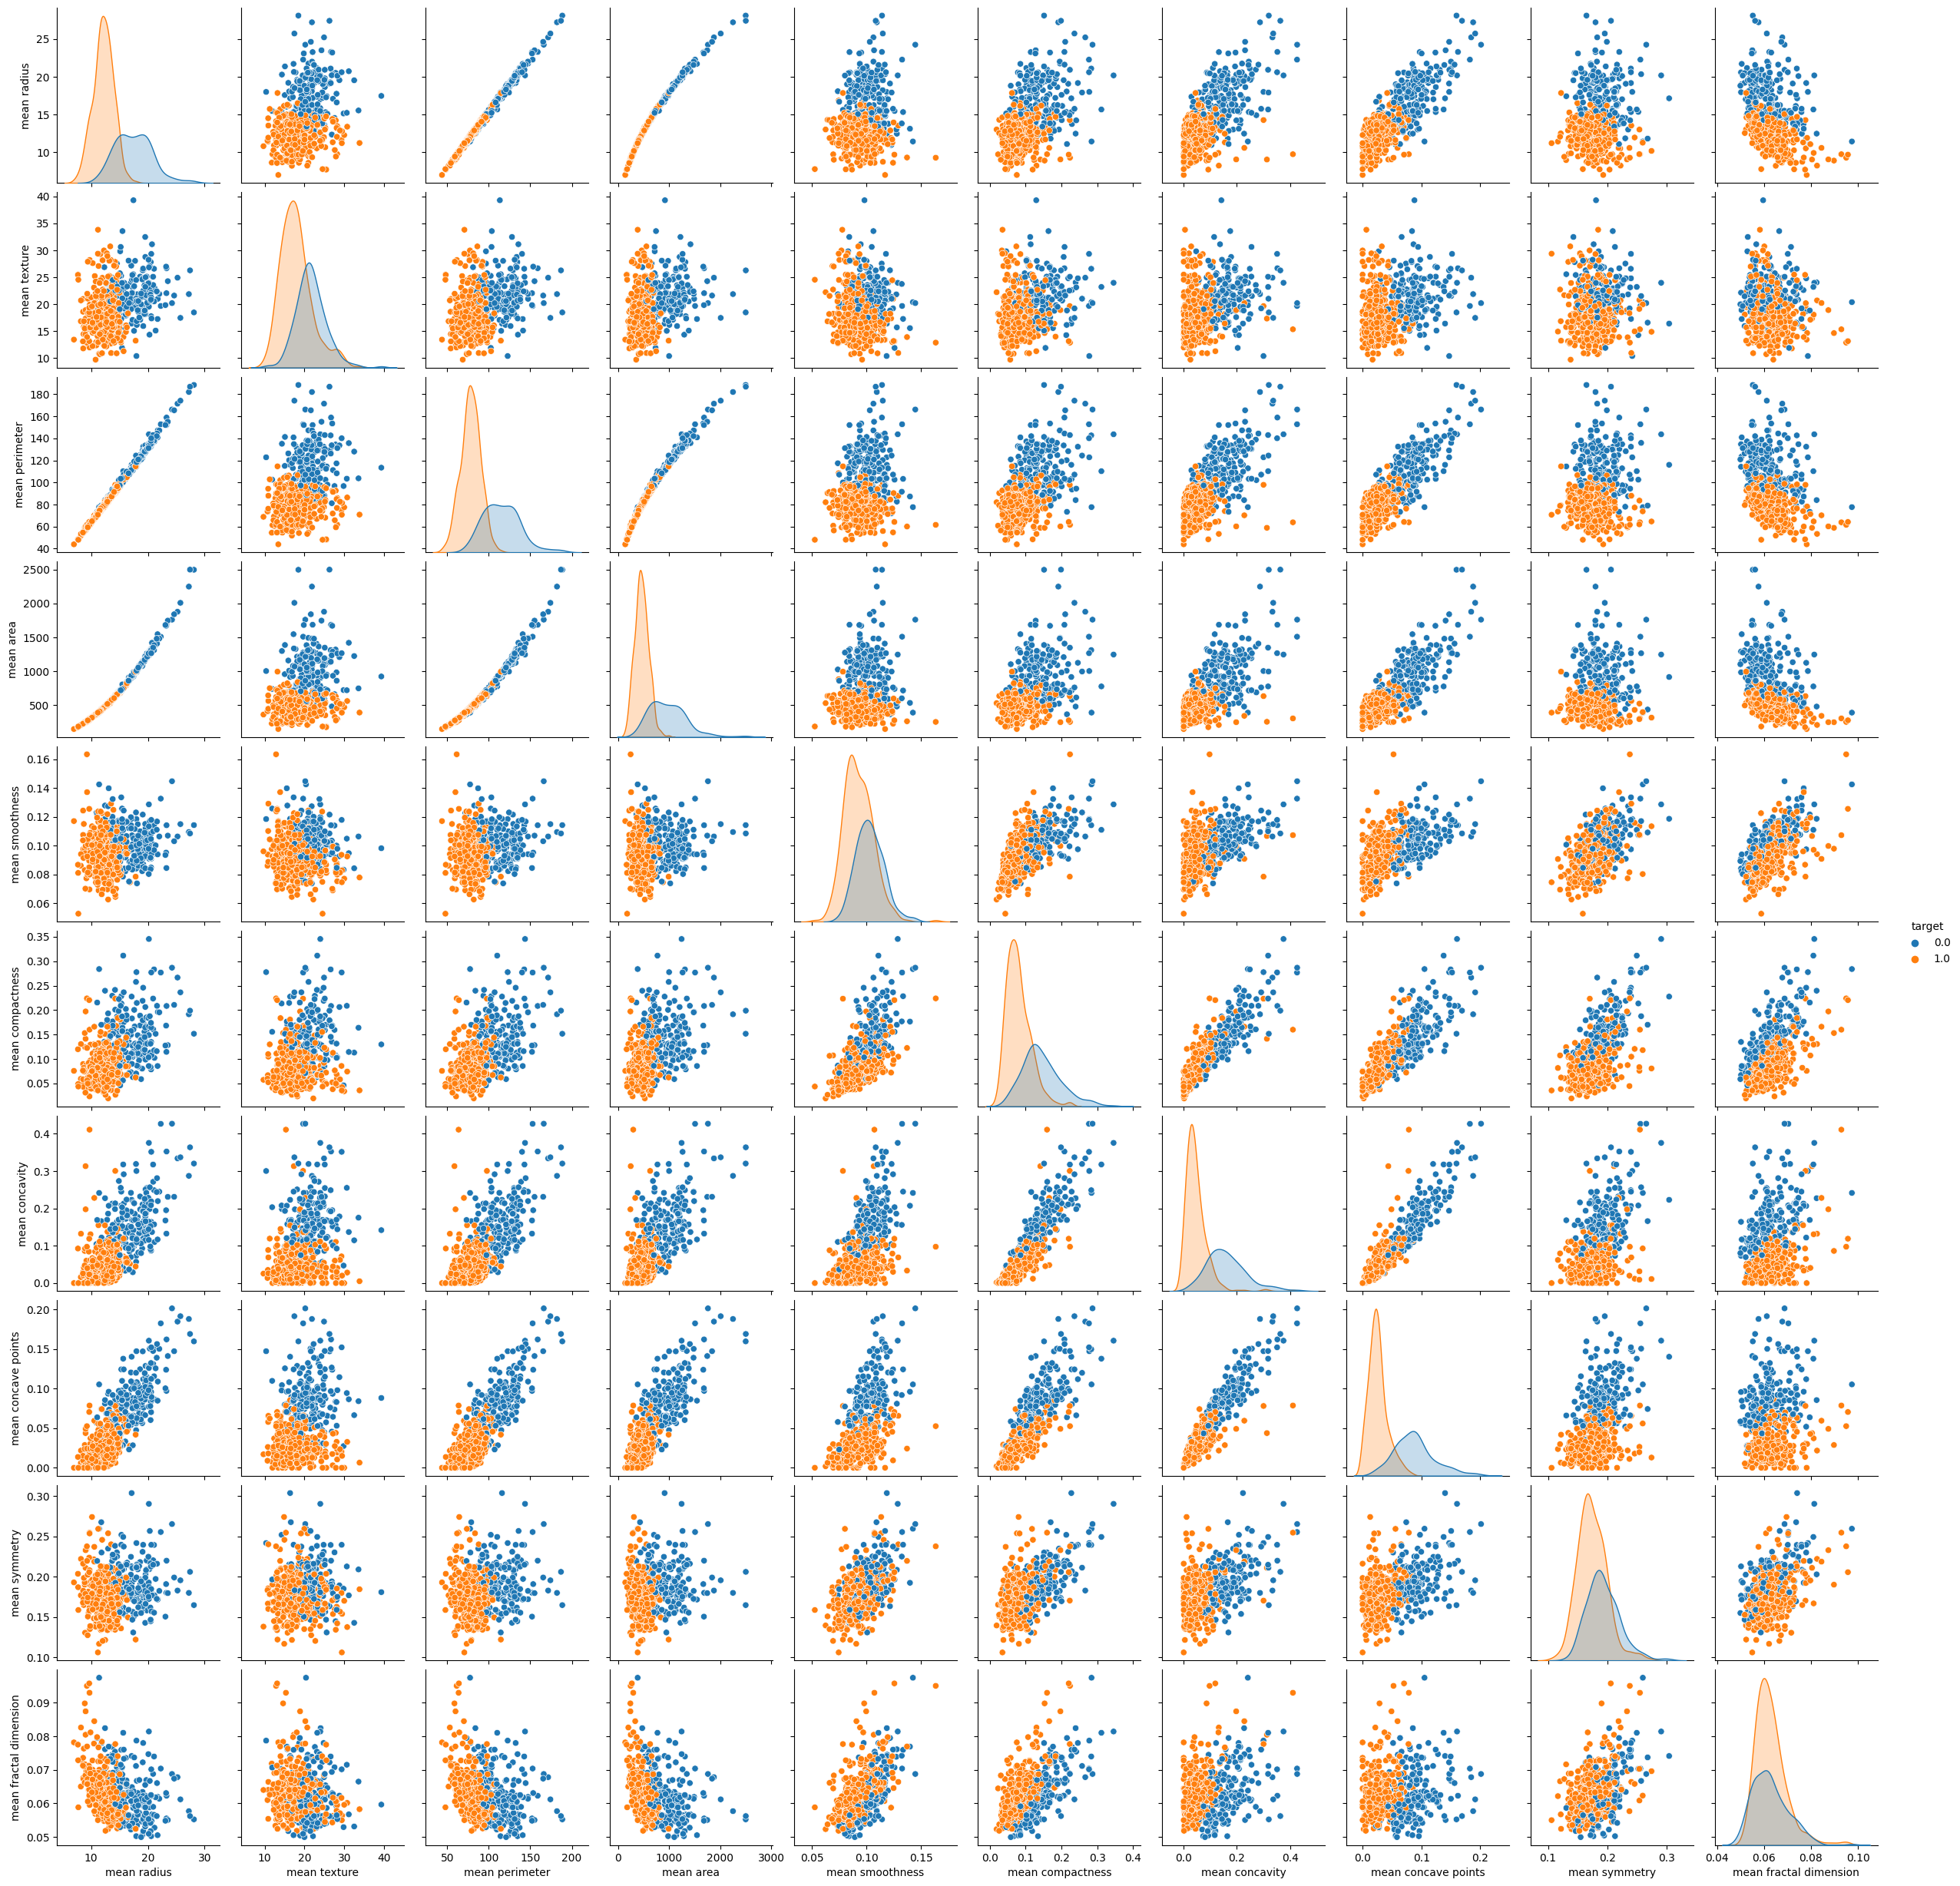

In [24]:
import seaborn as sns

sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'])

첫번째와 세번째 변수가 직선의 중간에서 구분된다 등등 자유롭게 (점수 주는 문제)
테이터의 차원이 깊다.

### 2.2(3점) <br/>
svm의 kernel은 다양한 형태가 존재합니다. 빈칸에 알맞게 작성한 후 실행해보고, 어느 모델이 가장 점수가 높은지 확인해보세요 (모든 kernel에 대해 비교해주세요)


Ans

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate

X = df.drop('target', axis=1)
y = df.target

kernel_list=['linear','rbf','poly', 'sigmoid']
for x in kernel_list:
  model = SVC(kernel=x)

  # 교차검증

  scores = cross_val_score(model, X, y, cv = 5)
  scores

  pd.DataFrame(cross_validate(model, X, y, cv = 5))

  print(x + '\'s mean_score:',scores.mean())

linear's mean_score: 0.9455364073901569
rbf's mean_score: 0.9121720229777983
poly's mean_score: 0.9086632510479739
sigmoid's mean_score: 0.4604409253221549


### 2.3(3점) <br/>
가장 높은 점수를 가진 kernel을 이용하여 분석을 이어 진행해보려 합니다.<br/><br/>
이번엔 데이터를 표준화를 해보고, 표준화 전과 후를 비교해보고, 값이 다르다면 이유를 설명하시오.


In [26]:
# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1107)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


Ans

In [27]:
# model 설정
model_1 = SVC(kernel = 'linear')
model_1.fit(X_train,y_train)

train_score = model_1.score(X_train, y_train)
test_score = model_1.score(X_test, y_test)

display(train_score, test_score)

0.9698492462311558

0.9649122807017544

In [28]:
from sklearn.preprocessing import StandardScaler

# StandarScaler 적용

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                      test_size = 0.3, random_state = 1107)



# SVM, kernel = 'linear'로 선형분리 진행

model_2 =SVC(kernel = 'linear')
model_2.fit(X_train, y_train)

train_score = model_2.score(X_train, y_train)
test_score = model_2.score(X_test, y_test)

display(train_score, test_score)

#답 : kernel은 linear로 진행하고, SVM은 경계를 결정하는 모델이므로 스케일링에 민감하기 떄문에 스케일링을 진행해야 더 성능이 좋아짐

0.9899497487437185

0.9766081871345029

### 2.4(3점) 5개의 이웃을 가진 KNN 모델을 생성한 후 실행해주세요

Ans

In [29]:
#train, test set은 scaled된 값으로 진행하겠습니다
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
score

0.9824561403508771

### 2.5(5점) 그리드서치로 하이퍼파라미터를 구해보고, 앞서 나온 모델보다 높은 값을 선보이는지 확인해보세요

목록은 다음과 같습니다 <br/>
'kernel':['linear', 'rbf','poly', 'sigmoid']<br/>
'C':[0.1,1,10,100,1000]<br/>
'gamma':[1,0.1, 0.01,0.001,0.0001]<br/>
'degree':[0, 1, 2, 3]<br/>
'coef0':[0.01,0.1,1,10,100]<br/>

Ans

In [30]:
from sklearn.model_selection import GridSearchCV

model=SVC()
param_grid = {'kernel':['linear', 'rbf','poly', 'sigmoid'], 'C':[0.1,1,10,100,1000], 'gamma':[1,0.1, 0.01,0.001,0.0001], 'degree':[0, 1, 2, 3], 'coef0':[0.01,0.1,1,10,100]}

grid_model = GridSearchCV(model, param_grid)

grid_model.fit(X_train, y_train)

grid_model.best_params_

{'C': 1000, 'coef0': 1, 'degree': 0, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [31]:
model_2 =SVC(C = 1000, coef0 = 1, degree = 0, gamma = 0.0001, kernel = 'sigmoid')
model_2.fit(X_train, y_train)

train_score = model_2.score(X_train, y_train)
test_score = model_2.score(X_test, y_test)

display(train_score, test_score)

0.9874371859296482

0.9766081871345029

### 2.6 (8점)
암수술을 성공적으로 마치고 집으로 돌아가는 비타민.<br/>
맛있는 와인을 마시기 위해 휴대폰으로 검색하던 도중, 그의 고질적인 분류병이 도지기 시작한다.<br/><br/>

BayesSearchCV를 이용한 SVM을 만들어 타민이가 분류를 잘 할 수 있도록 코드를 완성해주세요<br/><br/>
  C : 0.1 부터 100 사이 실수이며, 로그 스케일로 균일하게 분포되어있는 사전분포.
  <br/>
  gamma : 0.1부터 10 사이 실수이며, 로그 스케일로 균일하게 분포되어있는 사전분포.
  <br/>
  kernel : 'linear', 'rbf','poly','sigmoid' 중 하나.

(Hint)<br/>
https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html

https://www.youtube.com/watch?v=mxr8G4hDPcM

https://dacon.io/codeshare/5125

In [33]:
!pip install scikit-optimize

   ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
   ---------------------------------------- 107.7/107.7 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

# wine 데이터 로드

wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1107)


ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

Ans

In [35]:
opt = BayesSearchCV(
    SVC(),
    {
        'C': Real(1e-1, 1e+2, prior = 'log-uniform'),
        'gamma': Real(1e-1, 1e+1, prior ='log-uniform'),
        'kernel': Categorical (['linear', 'rbf','poly','sigmoid'])
    },
    n_iter= 32,
    random_state=1107
)

In [36]:
opt.fit(X_train_scaled,y_train)

c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.1, 'linear'] before, using random point [13.134488879659967, 0.31068180050041305, 'rbf']
  warnings.warn(


BayesSearchCV(estimator=SVC(), n_iter=32, random_state=1107,
              search_spaces={'C': Real(low=0.1, high=100.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=0.1, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'rbf', 'poly', 'sigmoid'), prior=None)})

In [37]:
y_train_pred = opt.predict(X_train_scaled)
y_test_pred = opt.predict(X_test_scaled)

print('train 정확도 :', metrics.accuracy_score(y_train_pred, y_train))
print('test 정확도 :', metrics.accuracy_score(y_test_pred, y_test))

train 정확도 : 1.0
test 정확도 : 0.9259259259259259


---

## 피마 인디언 당뇨병 예측
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- Pregnancies 임신 횟수
- Glucose 포도당 수치
- BloodPressure 혈압
- SkinThickness 피하지방
- Insulin 인슐린 수치
- BMI 체질량 수치
- DiabetesPedigreeFunction 당뇨 내력 가중치
- Age 나이
- Outcome 결과 (0: 정상 | 1: 당뇨병) 1: 당뇨병)

### 라이브러리 및 데이터 불러오기 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score # 평가를 위함
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')

# 0 : 죽음 | 1: 산다
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 평가 함수

### 문제 1-1. '???' 부분을 채워서 코드를 실행해주세요. (각 2점, 총 8점)

In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    
    print('오차 행렬\n {}'.format(confusion))
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'
         .format(accuracy, precision, recall))

### 정밀도, 재현율 그래프

### 문제1-2. '???' 부분을 채워서 코드를 실행해주세요. (각 2점, 총 6점)

In [40]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value') 
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

### 임곗값에 따른 평가

In [41]:
# Binarizer : threshold가 0.3보다 크면 1 , 작거나 같으면 0으로 출력
# 임곗값 : 0과 1로 예측하는 기준 : 분류 모델(LogisticRegression)은 기본 임곗값이 0.5이다.

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)  
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [42]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


UnboundLocalError: local variable 'accuracy' referenced before assignment

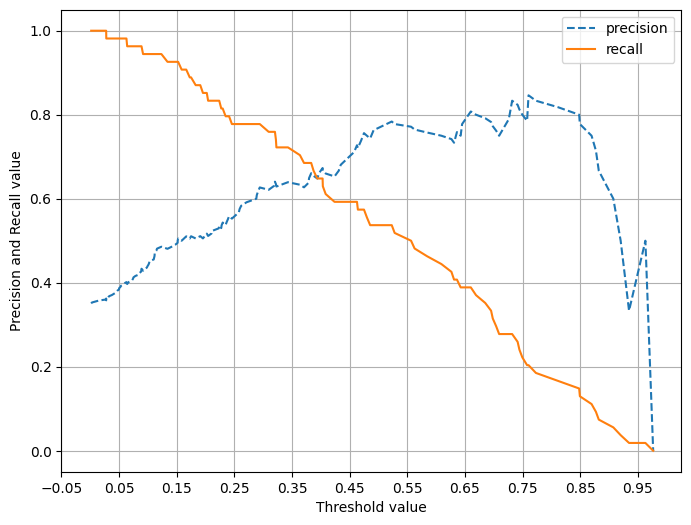

In [44]:
pred_proba_c1 = model.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### 데이터 전처리

In [45]:
# min이 0인 데이터가 이상하다. -> 예를 들어 포도당 수치가 0인 것
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [47]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

### 재검토

In [48]:
x_data = diabetes_data.iloc[:,:-1]
y_data = diabetes_data.iloc[:,[-1]]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size = 0.2, random_state = 1, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


UnboundLocalError: local variable 'accuracy' referenced before assignment

### 임곗값에 따른 평가 지표 값

### 문제 1-3. '???' 부분을 채워서 코드를 실행해주세요. (총 2점)

In [51]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = model.predict_proba(X_test)
???(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

NameError: name 'precision_recall' is not defined

### 최적의 임곗값으로 예측

In [52]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

UnboundLocalError: local variable 'accuracy' referenced before assignment

### 문제 X. 아래의 전처리 및 학습 코드를 실행하세요.

In [53]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [54]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

### 문제 1-4. 임곗값 별  F1 스코어를 구하는 아래의 코드를 완성하세요. (3점)

In [56]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        f1 = f1_score(y_test , custom_predict)
        print('F1 스코어: {0:.4f}'.format(f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
F1 스코어: 0.7576
임곗값: 0.45
F1 스코어: 0.7869
임곗값: 0.5
F1 스코어: 0.7966
임곗값: 0.55
F1 스코어: 0.7965
임곗값: 0.6
F1 스코어: 0.8000


<출력 답안>  
임곗값: 0.4  
F1 스코어: 0.7576  
임곗값: 0.45  
F1 스코어: 0.7869  
임곗값: 0.5  
F1 스코어: 0.7966  
임곗값: 0.55  
F1 스코어: 0.7965  
임곗값: 0.6  
F1 스코어: 0.8000

### 문제 1-5. 임곗값 변경에 따른 정밀도-재현율 변화 곡선을 그리는 아래 코드를 완성하세요. (3점)

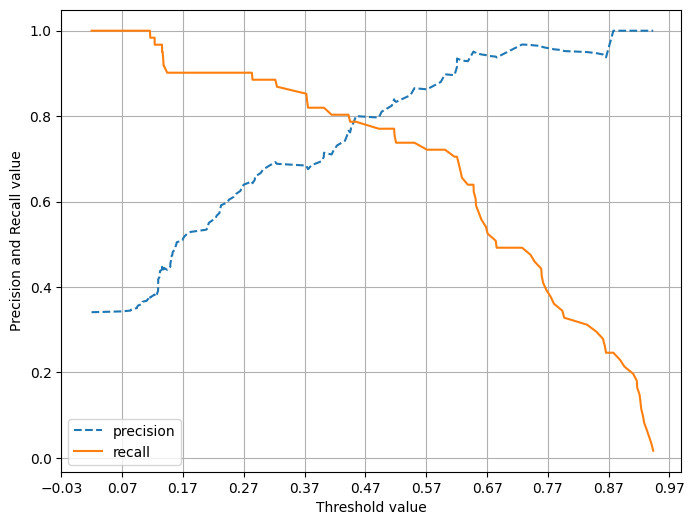

In [59]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

<출력 답안> 
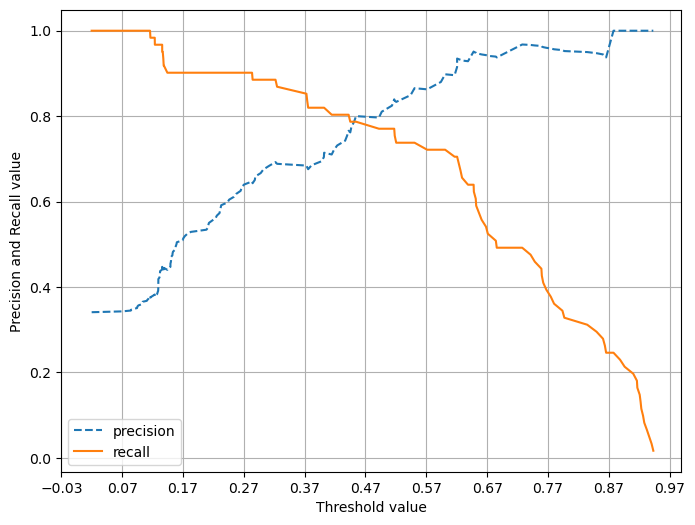

### 문제 1-6.  F1스코어를 설명하고, 추가로 높은 F1스코어를 얻기 위해 어떠한 정밀도와 재현율 값이 요구되는지 적어주세요. (문제 2.4. 2.5. 참고) (2점)

답: f1 스코어는 정밀도와 재현율의 조환 평균이다. 그렇기에 정밀도와 재현율이 둘다 높아야 높은 값을 가지게 된다.

### 문제 1-7 임곗값 별 FPR, TPR을 구하는 아래의 코드를 완성하세요. (3점)

In [60]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs, tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


<출력 답안>  
샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]  
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]  
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]  
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]  

### 문제 1-8 ROC 곡선을 그리는 아래 코드를 완성하세요. (3점)

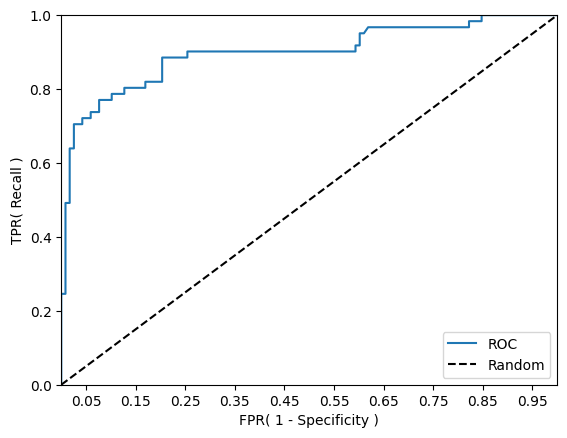

In [61]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

<출력 답안>
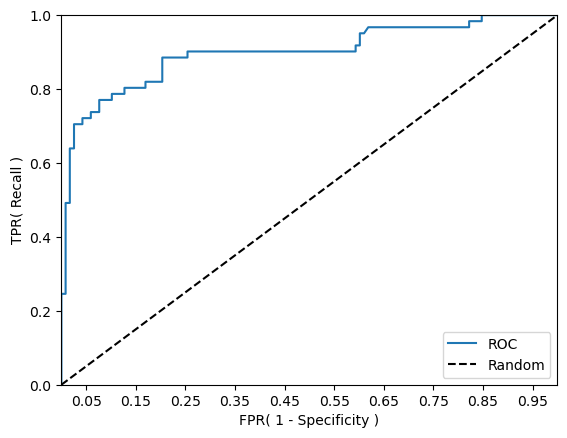

### 문제 1-9 임곗값 별 ROC AUC 스코어를 구하는 아래의 코드를 완성하세요. (3점)

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        roc_score = roc_auc_score(y_test, custom_predict)
        print('ROC AUC 값: {0:.4f}'.format(roc_score))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1),  thresholds)

임곗값: 0.4
ROC AUC 값: 0.8209
임곗값: 0.45
ROC AUC 값: 0.8384
임곗값: 0.5
ROC AUC 값: 0.8429
임곗값: 0.55
ROC AUC 값: 0.8392
임곗값: 0.6
ROC AUC 값: 0.8395


<출력 답안>  
임곗값: 0.4
ROC AUC 값: 0.8209  
임곗값: 0.45  
ROC AUC 값: 0.8384  
임곗값: 0.5  
ROC AUC 값: 0.8429  
임곗값: 0.55  
ROC AUC 값: 0.8392  
임곗값: 0.6  
ROC AUC 값: 0.8395  

### 문제 2-1. 라쏘 회귀와 릿지 회귀의 차이점을 서술하시오. (3점)

답: L1, L2규제의라는 차이점이 가장 크고, 그렇기에 손실 함수 형태도 비선형,선형으로 다르다.

아래 코드를 실행해주세요.

In [64]:
# 필요한 라이브러리 임포트
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [65]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ------------------------------ -------- 450.6/581.4 kB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 581.4/581.4 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   --------------------------------------  307.2/313.4 kB 18.6 MB/s eta 0:00:01
   ---------------------------------------- 313.4/313.4 kB 6.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
# 데이터 임포트

import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 문제 2-2 알파 값을 설정한 모델의 아래 코드를 완성하시오. (2점)

In [67]:

model_ridge_10 = Ridge(alpha=10).fit(X_train, y_train)

print('Train score:', model_ridge_10.score(X_train, y_train))
print('Test score:', model_ridge_10.score(X_test, y_test))


model_ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Train score:', model_ridge_01.score(X_train, y_train))
print('Test score:', model_ridge_01.score(X_test, y_test))

Train score: 0.7882787115369615
Test score: 0.6359411489177309
Train score: 0.9282273685001986
Test score: 0.7722067936479649


올바른 출력값 

Train score: 0.7882787115369614
Test score: 0.6359411489177311
Train score: 0.9282273685001983
Test score: 0.7722067936480148

### 문제 2-3. 알파 값이 커질수록 어떻게 되는지, 작을수록 어떻게 되는지 서술하시오. (3점)

답: 알파 값이 클수록 규제가 강하다, 규제는 과적합을 방지하고 모델의 안정성을 높이는데 사용된다.

### 문제 2-4. 릿지 회귀 모델의 시각화 코드를 완성하시오. (3점)

NameError: name 'model_ridge' is not defined

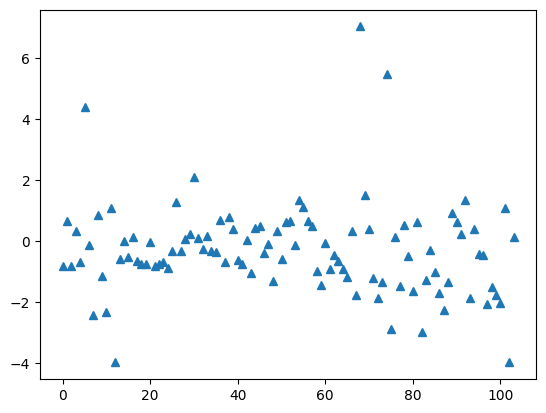

In [71]:
# Ridge 시각화


model = LinearRegression().fit(X_train, y_train)

plt.plot(model_ridge_10.coef_, '^', label='Ridge alpha=10')
plt.plot(model_ridge, 's', label='Ridge alpha=1')
plt.plot(model_ridge_01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(model.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(model.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

plt.show()

올바른 출력값
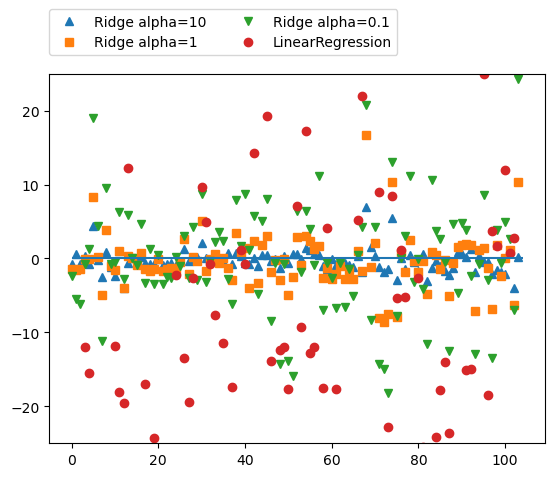

###  문제 2-5. 라쏘 회귀 모델의 코드를 조건에 맞게 완성하시오. (총 4점)

In [72]:
# 알파 값을 0.01로 최대 반복 횟수는 10000으로 설정하시오. 2점
model_lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train) 

print('Train score:', model_lasso_001.score(X_train, y_train))
print('Test score:', model_lasso_001.score(X_test, y_test))
print('사용한 특성 수:', np.sum(model_lasso_001.coef_!= 0)) #2점



model_lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('Train score:', model_lasso_00001.score(X_train, y_train))
print('Test score:', model_lasso_00001.score(X_test, y_test))
print('사용한 특성 수:', np.sum(model_lasso_00001.coef_ != 0))

Train score: 0.8962226511086497
Test score: 0.7656571174549982
사용한 특성 수: 33
Train score: 0.9507158754515463
Test score: 0.6437467421272821
사용한 특성 수: 96


올바른 출력값

Train score: 0.8962226511086498
Test score: 0.7656571174549986
사용한 특성 수: 33
Train score: 0.9507158754515462
Test score: 0.6437467421273156
사용한 특성 수: 96

### 문제 2-6. 라쏘 회귀에서 알파 값을 낮출수록 최대 반복 횟수는 어떻게 조정해야 하는지 서술하시오. (2점)

답: 낮출수록 최대 반혹 횟수를 늘려야 한다.